In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read csv files and save them as a dataframe
Rdata_df = pd.read_csv('ride_data.csv')
Cdata_df = pd.read_csv('city_data.csv')

#Calculate the average fare per and total rides per city
Avg_Fare = pd.DataFrame(Rdata_df.groupby('city')['fare'].mean())
Avg_Fare = Avg_Fare.reset_index()
Total_Rides = pd.DataFrame(Rdata_df.groupby('city')['ride_id'].count())
Total_Rides = Total_Rides.reset_index()
Total_Rides = Total_Rides.rename(columns={'ride_id':'total number of rides'})
Drivers = pd.DataFrame(Cdata_df.groupby('city')['driver_count'].sum())
Drivers = Drivers.reset_index()
Type = Cdata_df[['city','type']].drop_duplicates()
Type = pd.DataFrame(Cdata_df.drop_duplicates())
Type = Type.reset_index()
Type = Type[['city','type']]

#Merge the data into one dataframe
Pyber_Data1 = pd.merge(Drivers,Avg_Fare, how = 'inner', on = 'city')
Pyber_Data2 = pd.merge(Pyber_Data1, Total_Rides, how = 'inner', on = 'city')
Pyber_Data3 = pd.merge(Pyber_Data2, Type, how='inner',on='city')
Pyber_Data = Pyber_Data3.rename(columns = {'fare':'average fare','driver_count':'driver count'})
Pyber_Data_format = Pyber_Data
Pyber_Data_format['average fare'] = Pyber_Data_format['average fare'].map("${0:,.2f}".format)
Pyber_Data_format = Pyber_Data_format[['city','total number of rides','average fare','driver count','type']]
Pyber_Data_format.head(5)

,city,total number of rides,average fare,driver count,type
0,Alvarezhaven,31,$23.93,21,Urban
1,Alyssaberg,26,$20.61,67,Urban
2,Anitamouth,9,$37.32,16,Suburban
3,Antoniomouth,22,$23.62,21,Urban
4,Aprilchester,19,$21.98,49,Urban


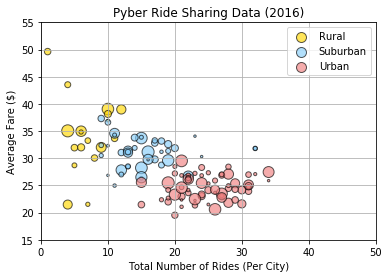

In [3]:
fig, ax = plt.subplots()
groups = Pyber_Data3.groupby('type')
colors = ['Gold','lightskyblue','lightcoral']
for i, (name, group) in enumerate(groups):
    group.plot(kind = 'scatter', x='total number of rides',y='fare', ylim=((15,55)), xlim=((0,50)), s=Pyber_Data3['driver_count'].values*2, label=name, ax=ax, color=colors[i], edgecolor='black', alpha=0.65)
lgd = ax.legend(numpoints=1)
ax.set_ylabel('Average Fare ($)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_title('Pyber Ride Sharing Data (2016)')
ax.grid()
for handle in lgd.legendHandles:
    handle.set_sizes([100.0])
plt.show()

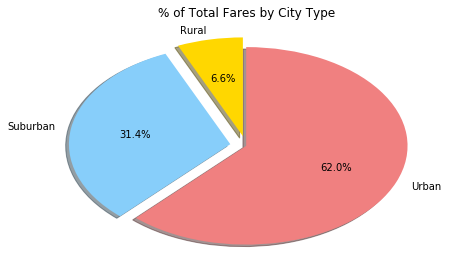

In [7]:
Rides_df = pd.merge(Rdata_df,Cdata_df,how ='right', on='city')
Fare_Type = pd.DataFrame(Rides_df.groupby('type')['fare'].sum())
Fare_Type = Fare_Type.reset_index()

Cutout1 = [0.1,0.1,0]
plt.pie(Fare_Type['fare'], explode=Cutout1, labels = Fare_Type['type'], colors = colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('% of Total Fares by City Type')
plt.tight_layout()
plt.show()

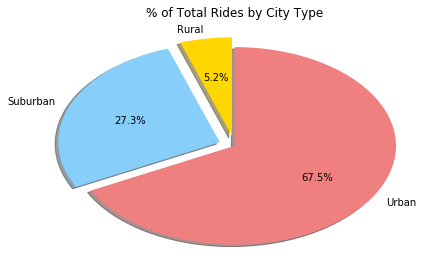

In [5]:
Rides_Type = pd.DataFrame(Rides_df.groupby('type')['fare'].count())
Rides_Type = Rides_Type.reset_index()
Rides_Type = Rides_Type.rename(columns={'fare':'total rides'})

Cutout2 = [0.1,0.1,0]
plt.pie(Rides_Type['total rides'], explode=Cutout2, labels = Rides_Type['type'], colors = colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('% of Total Rides by City Type')
plt.tight_layout()
plt.show()

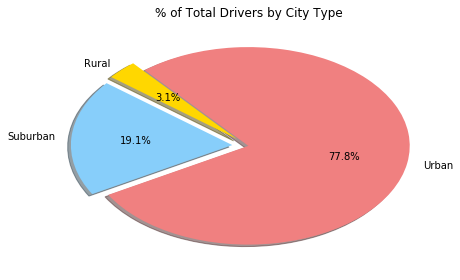

In [6]:
Driver_Count = pd.DataFrame(Cdata_df.groupby('type')['driver_count'].sum())
Driver_Count= Driver_Count.reset_index()
Cutout2 = [0.1,0.1,0]
plt.pie(Driver_Count['driver_count'], explode=Cutout2, labels = Driver_Count['type'], colors = colors, autopct="%1.1f%%", shadow=True, startangle=130)
plt.title('% of Total Drivers by City Type')
plt.tight_layout()
plt.show()